In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.max_columns', None)

In [63]:
data = pd.read_csv('renins_train.csv',sep=';', index_col = 'POLICY_ID')
data[:10]

,DATA_TYPE,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,POLICY_INTERMEDIARY,INSURER_GENDER,POLICY_CLM_N,POLICY_CLM_GLT_N,POLICY_PRV_CLM_N,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
POLICY_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,TRAIN,1,1,1,39,1,Москва,51,12,Land Rover,Discovery,245.0,0,1283202.0,856,F,0,0,N,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
2,TRAIN,1,1,1,50,5,Москва,35,7,Opel,Zafira,140.0,0,453000.0,N,M,0,0,0,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
3,TRAIN,1,1,1,52,6,Москва,41,6,Kia,Soul,129.0,0,647718.0,N,F,0,0,1L,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
4,TRAIN,1,1,1,50,5,Москва,36,12,Citroen,C-Crosser,170.0,0,757795.0,N,M,0,0,0,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
5,TRAIN,1,1,0,52,6,Санкт-Петербург,42,5,Renault,Logan,102.0,0,604500.0,171,F,0,0,N,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17
6,TRAIN,2,1,1,2,4,Санкт-Петербург,60,40,Suzuki,Grand Vitara,140.0,0,535815.0,174,M,0,0,0,0,0,0,0,0.0,0,3,7500.0,Санкт-Петербург,-0.02
7,TRAIN,1,1,1,52,6,Москва,41,6,Kia,Sorento,175.0,0,1696400.0,1372,F,0,0,N,N,0,0,0,0.0,0,0,0.0,Москва,-0.23
8,TRAIN,2,2,1,10,1,Санкт-Петербург,48,19,Hyundai,Santa Fe,197.0,0,1063317.0,1373,M,0,0,0,0,1,1,0,0.0,0,3,0.0,Санкт-Петербург,0.04
9,TRAIN,1,1,0,53,6,Москва,27,7,BMW,X3,245.0,0,2248000.0,849,F,1S,1S,N,N,0,0,0,4.0,0,0,0.0,Москва,-1.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96605 entries, 1 to 96605
Data columns (total 29 columns):
DATA_TYPE                        96605 non-null object
POLICY_BEGIN_MONTH               96605 non-null int64
POLICY_END_MONTH                 96605 non-null int64
POLICY_IS_RENEWED                96605 non-null int64
POLICY_SALES_CHANNEL             96605 non-null int64
POLICY_SALES_CHANNEL_GROUP       96605 non-null int64
POLICY_BRANCH                    96605 non-null object
POLICY_MIN_AGE                   96605 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    96605 non-null int64
VEHICLE_MAKE                     96605 non-null object
VEHICLE_MODEL                    96605 non-null object
VEHICLE_ENGINE_POWER             96605 non-null float64
VEHICLE_IN_CREDIT                96605 non-null int64
VEHICLE_SUM_INSURED              96605 non-null float64
POLICY_INTERMEDIARY              96605 non-null object
INSURER_GENDER                   96605 non-null object
POLICY_CLM_N     

In [4]:
data.describe()

,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_DEDUCT_VALUE,POLICY_PRICE_CHANGE
count,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,9.660500e+04,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000
mean,6.891393,6.870400,0.500761,47.345251,5.123265,42.580767,34.910357,154.195851,0.321950,9.806700e+05,0.277480,0.550303,0.001014,3.877110,0.007660,5974.134461,-0.033025
std,3.400597,3.403665,0.500002,14.034159,1.585213,10.694670,199.928966,54.117543,0.467226,6.900919e+05,0.447758,0.497466,0.031834,17.635091,0.087186,10418.697183,0.857995
min,1.000000,1.000000,0.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,4.000000,4.000000,0.000000,50.000000,5.000000,34.000000,8.000000,123.000000,0.000000,5.584960e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.170000
50%,7.000000,7.000000,1.000000,52.000000,6.000000,41.000000,14.000000,146.000000,0.000000,8.090000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,10.000000,1.000000,53.000000,6.000000,50.000000,19.000000,171.000000,1.000000,1.163900e+06,1.000000,1.000000,0.000000,0.000000,0.000000,10000.000000,0.050000
max,12.000000,12.000000,1.000000,63.000000,8.000000,86.000000,2015.000000,2000.000000,1.000000,9.449000e+06,1.000000,1.000000,1.000000,737.000000,1.000000,120873.000000,60.020000


In [32]:
# Проверим, все ли заполнено

def print_nan(X):
    count = X.count()
    print(len(X))
    print(count[count < len(X)])
    
print_nan(data)

96605
Series([], dtype: int64)


In [6]:
# Посмотрим значения признаков
for column in data.columns:
    print(column, ':', pd.Series(data[column].unique()).count())
    print(np.sort(data[column].unique()))

DATA_TYPE : 2
['TEST ' 'TRAIN']
POLICY_BEGIN_MONTH : 12
[ 1  2  3  4  5  6  7  8  9 10 11 12]
POLICY_END_MONTH : 12
[ 1  2  3  4  5  6  7  8  9 10 11 12]
POLICY_IS_RENEWED : 2
[0 1]
POLICY_SALES_CHANNEL : 63
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
POLICY_SALES_CHANNEL_GROUP : 8
[1 2 3 4 5 6 7 8]
POLICY_BRANCH : 2
['Москва' 'Санкт-Петербург']
POLICY_MIN_AGE : 68
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 86]
POLICY_MIN_DRIVING_EXPERIENCE : 112
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46 

POLICY_CLM_GLT_N : 7
['0' '1L' '1S' '2' '3' '4+' 'n/d']
POLICY_PRV_CLM_N : 7
['0' '1L' '1S' '2' '3' '4+' 'N']
POLICY_PRV_CLM_GLT_N : 7
['0' '1L' '1S' '2' '3' '4+' 'N']
CLIENT_HAS_DAGO : 2
[0 1]
CLIENT_HAS_OSAGO : 2
[0 1]
POLICY_COURT_SIGN : 2
[0 1]
CLAIM_AVG_ACC_ST_PRD : 709
[0.00000000e+00 2.50000000e-01 3.33333333e-01 4.00000000e-01
 4.28571429e-01 5.00000000e-01 6.00000000e-01 6.66666667e-01
 7.50000000e-01 8.00000000e-01 1.00000000e+00 1.25000000e+00
 1.33333333e+00 1.40000000e+00 1.50000000e+00 1.66666667e+00
 1.75000000e+00 1.80000000e+00 2.00000000e+00 2.20000000e+00
 2.25000000e+00 2.33333333e+00 2.40000000e+00 2.42857143e+00
 2.50000000e+00 2.60000000e+00 2.66666667e+00 2.75000000e+00
 2.80000000e+00 3.00000000e+00 3.16666667e+00 3.20000000e+00
 3.25000000e+00 3.33333333e+00 3.50000000e+00 3.60000000e+00
 3.66666667e+00 3.75000000e+00 3.88888889e+00 4.00000000e+00
 4.16666667e+00 4.20000000e+00 4.25000000e+00 4.33333333e+00
 4.50000000e+00 4.60000000e+00 4.66666667e+00 4.75000

In [75]:
train = data.copy()

# ВАЗ и Lada - одно и тоже
def map_lada(x):
    if "ВАЗ" in x:
        return "Lada"
    else:
        return x
def clear_ru_models(x):
    if 'Kalina' in x:
        return 'Kalina'
    if 'Priora' in x:
        return 'Priora'
    if 'Patriot' in x:
        return 'Patriot'
    return x
    
train['VEHICLE_MAKE'] = train['VEHICLE_MAKE'].map(map_lada)
train['VEHICLE_MODEL'] = train['VEHICLE_MODEL'].map(clear_ru_models)
# Подправим ошибки в данных
train['ERR_AGE'] = 0
for i in train.index:
    if 'Прицеп' in train.loc[i, 'VEHICLE_MODEL'] and train.loc[i, 'VEHICLE_ENGINE_POWER'] != 0:
        train.at[i, 'VEHICLE_ENGINE_POWER'] = 0
    if train.loc[i, 'VEHICLE_ENGINE_POWER'] == 0 and 'Прицеп' not in train.loc[i, 'VEHICLE_MODEL']:
        train.at[i, 'VEHICLE_ENGINE_POWER'] = np.nan
    # Можно оптимальнее, уже не хочу переписывать рабочий код
    if train.loc[i, 'VEHICLE_ENGINE_POWER'] > 1000:
        train.at[i, 'VEHICLE_ENGINE_POWER'] = train.loc[i, 'VEHICLE_ENGINE_POWER'] / 10
    if train.loc[i, 'POLICY_MIN_DRIVING_EXPERIENCE'] > 1900:
        train.at[i, 'POLICY_MIN_DRIVING_EXPERIENCE'] = 2018 - train.loc[i, 'POLICY_MIN_DRIVING_EXPERIENCE']
    # Кто-то имеет ВУ, полученное раньше 16 лет?
    if train.loc[i, 'POLICY_MIN_AGE'] - train.loc[i, 'POLICY_MIN_DRIVING_EXPERIENCE'] > 16:
        train.at[i, 'ERR_AGE'] = 1        
        
train['VEHICLE_ENGINE_POWER'] = train.groupby('VEHICLE_MAKE')['VEHICLE_ENGINE_POWER'].apply(lambda x: x.fillna(x.mean()))
train['VEHICLE_ENGINE_POWER'] = train['VEHICLE_ENGINE_POWER'].fillna(value = train['VEHICLE_ENGINE_POWER'].mean())
train['VEHICLE_ENGINE_POWER'] = train['VEHICLE_ENGINE_POWER'].map(np.floor)

train.at[train['POLICY_INTERMEDIARY'] == 'N', 'POLICY_INTERMEDIARY'] = 0
train['POLICY_INTERMEDIARY'] = train['POLICY_INTERMEDIARY'].astype('int64')
train['INSURER_GENDER'] = train['INSURER_GENDER'].map({'M': 0, 'F': 1})
train['POLICY_BRANCH'] = train['POLICY_BRANCH'].map({'Москва': 0, 'Санкт-Петербург': 1})
train['POLICY_DEDUCT_VALUE'] = train['POLICY_DEDUCT_VALUE'].map(np.floor)
# VEHICLE_SUM_INSURED == 0 - явная ошибка, но таких 42 записи. Модель должна обучиться, но мне нужно ненулевое значение.
train.at[train['VEHICLE_SUM_INSURED'] == 0, 'VEHICLE_SUM_INSURED'] = np.nan
train['VEHICLE_SUM_INSURED'] = train.groupby('VEHICLE_MODEL')['VEHICLE_SUM_INSURED'].apply(lambda x: x.fillna(x.median()))
train['VEHICLE_SUM_INSURED'] = train.groupby('VEHICLE_MAKE')['VEHICLE_SUM_INSURED'].apply(lambda x: x.fillna(x.median()))
train['VEHICLE_SUM_INSURED'] = train['VEHICLE_SUM_INSURED'].fillna(value = train['VEHICLE_SUM_INSURED'].mean()) # Хотя может логичнее и выбросить, так как единственный и в train

train['DEDUCT_RATIO'] = train['POLICY_DEDUCT_VALUE'].divide(train['VEHICLE_SUM_INSURED'])
train['STARTED_TO_DRIVE'] = train['POLICY_MIN_AGE'] - train['POLICY_MIN_DRIVING_EXPERIENCE']

train.at[train['POLICY_YEARS_RENEWED_N'] == 'N', 'POLICY_YEARS_RENEWED_N'] = '0'
train['POLICY_YEARS_RENEWED_N'] = train['POLICY_YEARS_RENEWED_N'].astype('int64')
train['INSURANCE_RATIO'] = train['POLICY_YEARS_RENEWED_N'].divide(train['POLICY_MIN_AGE'])
train['INSURANCE_RATIO'] = train['INSURANCE_RATIO'].map(lambda x: -1 if (x == np.nan) or (x == np.inf) else x)

train['VEHICLE_MODEL'] = train['VEHICLE_MAKE'] + ' ' + train['VEHICLE_MODEL']

# Страховка на год
train['YEAR_INSURANCE'] = 1
train.at[abs(train['POLICY_BEGIN_MONTH'] - train['POLICY_END_MONTH']) % 11 > 1, 'YEAR_INSURANCE'] = 0
train['POLICY_PRICE_CHANGE_SIGN'] = train['POLICY_PRICE_CHANGE'].map(np.sign)

train['FIRST_YEAR_DRIVING'] = train['POLICY_MIN_DRIVING_EXPERIENCE'].map(lambda x: 1 if x == 0 else 0)
train['AGE_STARTED'] = train['POLICY_MIN_AGE'] - train['POLICY_MIN_DRIVING_EXPERIENCE']
train['AGE_STARTED'] = train['AGE_STARTED'].map(lambda x: 16 if x < 16 else x)
for column in ['POLICY_CLM_N', 'POLICY_CLM_GLT_N', 'POLICY_PRV_CLM_N', 'POLICY_PRV_CLM_GLT_N']:
    train[column + '_INIT'] = train[column]
    train[column + '_INIT'] = train[column + '_INIT'].map(lambda x: 'N' if x == 'n/d' else x)
for column in ['POLICY_CLM_N_INIT', 'POLICY_CLM_GLT_N_INIT', 'POLICY_PRV_CLM_N_INIT', 'POLICY_PRV_CLM_GLT_N_INIT']:
    train[column] = train[column].astype('category')
    train[column] = train[column].cat.set_categories(['N', '0', '1S', '1L', '2', '3', '4+'], ordered = True)
for column in ['POLICY_CLM_N', 'POLICY_CLM_GLT_N', 'POLICY_PRV_CLM_N', 'POLICY_PRV_CLM_GLT_N']:
    train[column] = train[column].map(lambda x: 'N' if x == 'n/d' else x)
    train[column + '_C'] = train[column].map(lambda x: 0 if (x == '0') or (x == 'N') or (x == '1L') else 1)
    train[column] = train[column].map(lambda x: '0' if x == 'N' else '1' if (x == '1S') or (x == '1L') else '4' if x == '4+' else x)
    train[column] = train[column].astype('int')
train['NO_CLM'] = (train['POLICY_CLM_N'] == 0).mul(train['POLICY_PRV_CLM_N'] == 0).map(lambda x: 1 if x else 0)
train['NO_CLM_GLT'] = (train['POLICY_CLM_GLT_N'] == 0).mul(train['POLICY_PRV_CLM_GLT_N'] == 0).map(lambda x: 1 if x else 0)

train['BAD_TEND'] = (train['POLICY_CLM_N'] > train['POLICY_PRV_CLM_N']) | ((train['POLICY_CLM_N_C'] - train['POLICY_PRV_CLM_N_C']) > 0)
train['BAD_TEND'] = train['BAD_TEND'].map(lambda x: 1 if x else 0)

train['YOUNG'] = train['POLICY_MIN_AGE'].map(lambda x: 1 if x <= 25 else 0)
train['LOW_EXP'] = train['POLICY_MIN_DRIVING_EXPERIENCE'].map(lambda x: 1 if x <= 3 else 0)

for column in ['POLICY_MIN_AGE', 'POLICY_MIN_DRIVING_EXPERIENCE', 'VEHICLE_SUM_INSURED', 'VEHICLE_ENGINE_POWER']:
    train[column] = train[column].map(np.log1p)

columns = ['CLAIM_AVG_ACC_ST_PRD', 'POLICY_DEDUCT_VALUE', 'POLICY_PRICE_CHANGE', 'POLICY_YEARS_RENEWED_N']
for column in columns:
    mean = train[column].mean()
    train[column + '_RATIO'] = train[column] / mean
train['NO_DEDUCT'] = train['POLICY_DEDUCT_VALUE'].map(lambda x: 1 if x == 0 else 0)

ohe = LabelEncoder()
columns = ['VEHICLE_MAKE', 'VEHICLE_MODEL', 'CLIENT_REGISTRATION_REGION', 'POLICY_SALES_CHANNEL', 'POLICY_SALES_CHANNEL_GROUP', 'POLICY_BRANCH', 'POLICY_INTERMEDIARY', 'POLICY_CLM_N_INIT', 'POLICY_CLM_GLT_N_INIT', 'POLICY_PRV_CLM_N_INIT', 'POLICY_PRV_CLM_GLT_N_INIT']
for column in columns:
    train[column] = ohe.fit_transform(train[column])

train['ENGINE_POWER_BINS'] = pd.cut(train['VEHICLE_ENGINE_POWER'], bins = [-1, 50, 70, 100, 150, 200, 250, 300, 350, 400, 500, 600, 1000], labels = False)
train['MIN_AGE_BINS'] = pd.cut(train['POLICY_MIN_AGE'], bins = 6, labels = False)
train['EXPERIENCE_BINS'] = pd.cut(train['POLICY_MIN_DRIVING_EXPERIENCE'], bins = [-1, 0, 3, 10, 20, 30, 40, 50, 100], labels = False)
train['SUM_BINS'] = pd.cut(train['VEHICLE_SUM_INSURED'], bins = [0, 50000, 100000, 200000, 300000, 500000, 1000000, 2000000, 3000000, 10000000], labels = False)
train['PRD_BINS_Q'] = pd.qcut(train['VEHICLE_SUM_INSURED'], q = 10, labels = False)
train['PRD_BINS'] = pd.cut(train['VEHICLE_SUM_INSURED'], bins = 10, labels = False)
train['CLAIM_BINS_Q'] = pd.cut(train['CLAIM_AVG_ACC_ST_PRD'], bins = 5, labels = False)
train['DEDUCT_BINS'] = pd.cut(train['POLICY_DEDUCT_VALUE'], bins = 5, labels = False)
train['PRICE_BINS'] = pd.cut(train['POLICY_PRICE_CHANGE'], bins = 10, labels = False)
train = train.drop('POLICY_END_MONTH', axis = 1)
train['COMPL_AND_COURT'] = train['POLICY_HAS_COMPLAINTS'] + train['POLICY_COURT_SIGN']
train['COMPL_OR_COURT'] = train['COMPL_AND_COURT'].map(lambda x: 0 if x == 0 else 1)

N = 10
kmeans = KMeans(n_clusters = N, init = 'k-means++', random_state = 42)
train['f1'] = kmeans.fit_predict(train[['INSURER_GENDER', 'MIN_AGE_BINS', 'SUM_BINS', 'DEDUCT_BINS']])
train['f2'] = kmeans.fit_predict(train[['INSURER_GENDER', 'MIN_AGE_BINS', 'CLIENT_REGISTRATION_REGION']])
train['f3'] = kmeans.fit_predict(train[['INSURER_GENDER', 'MIN_AGE_BINS']])
train['f4'] = kmeans.fit_predict(train[['INSURER_GENDER', 'MIN_AGE_BINS', 'ENGINE_POWER_BINS']])
train['f5'] = kmeans.fit_predict(train[['INSURER_GENDER', 'MIN_AGE_BINS', 'SUM_BINS', 'DEDUCT_BINS']])
train['f6'] = kmeans.fit_predict(train[['INSURER_GENDER', 'MIN_AGE_BINS', 'POLICY_HAS_COMPLAINTS', 'POLICY_COURT_SIGN']])
train['f7'] = kmeans.fit_predict(train[['INSURER_GENDER', 'MIN_AGE_BINS', 'COMPL_OR_COURT']])
train['f8'] = kmeans.fit_predict(train[['INSURER_GENDER', 'MIN_AGE_BINS', 'COMPL_AND_COURT']])


columns = ['POLICY_YEARS_RENEWED_N', 'VEHICLE_MAKE', 'VEHICLE_MODEL', 'CLIENT_REGISTRATION_REGION', 'POLICY_SALES_CHANNEL', 'POLICY_SALES_CHANNEL_GROUP', 'POLICY_BRANCH', 'POLICY_INTERMEDIARY', 'ENGINE_POWER_BINS', 'MIN_AGE_BINS', 'EXPERIENCE_BINS', 'SUM_BINS', 'PRD_BINS_Q', 'PRD_BINS', 'CLAIM_BINS_Q', 'DEDUCT_BINS', 'PRICE_BINS', 'POLICY_CLM_N_INIT', 'POLICY_CLM_GLT_N_INIT', 'POLICY_PRV_CLM_N_INIT', 'POLICY_PRV_CLM_GLT_N_INIT', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']#, 'POLICY_CLM_N', 'POLICY_CLM_GLT_N', 'POLICY_PRV_CLM_N', 'POLICY_PRV_CLM_GLT_N']
for column in columns:
    train = pd.get_dummies(train, columns = [column], prefix = column)

In [10]:
for column in train.columns:
    print(column, ':', pd.Series(train[column].unique()).count())
    #print(np.sort(train[column].unique()))

DATA_TYPE : 2
POLICY_BEGIN_MONTH : 12
POLICY_IS_RENEWED : 2
POLICY_MIN_AGE : 68
POLICY_MIN_DRIVING_EXPERIENCE : 61
VEHICLE_ENGINE_POWER : 341
VEHICLE_IN_CREDIT : 2
VEHICLE_SUM_INSURED : 44647
INSURER_GENDER : 2
POLICY_CLM_N : 5
POLICY_CLM_GLT_N : 5
POLICY_PRV_CLM_N : 5
POLICY_PRV_CLM_GLT_N : 5
CLIENT_HAS_DAGO : 2
CLIENT_HAS_OSAGO : 2
POLICY_COURT_SIGN : 2
CLAIM_AVG_ACC_ST_PRD : 709
POLICY_HAS_COMPLAINTS : 2
POLICY_YEARS_RENEWED_N : 11
POLICY_DEDUCT_VALUE : 235
POLICY_PRICE_CHANGE : 592
ERR_AGE : 2
DEDUCT_RATIO : 19383
STARTED_TO_DRIVE : 92
INSURANCE_RATIO : 373
YEAR_INSURANCE : 2
POLICY_PRICE_CHANGE_SIGN : 3
FIRST_YEAR_DRIVING : 2
AGE_STARTED : 61
POLICY_CLM_N_INIT : 7
POLICY_CLM_GLT_N_INIT : 7
POLICY_PRV_CLM_N_INIT : 7
POLICY_PRV_CLM_GLT_N_INIT : 7
POLICY_CLM_N_C : 2
POLICY_CLM_GLT_N_C : 2
POLICY_PRV_CLM_N_C : 2
POLICY_PRV_CLM_GLT_N_C : 2
NO_CLM : 2
NO_CLM_GLT : 2
BAD_TEND : 2
YOUNG : 2
LOW_EXP : 2
CLAIM_AVG_ACC_ST_PRD_RATIO : 709
POLICY_DEDUCT_VALUE_RATIO : 235
POLICY_PRICE_CHANGE_RA

VEHICLE_MODEL_325 : 2
VEHICLE_MODEL_326 : 2
VEHICLE_MODEL_327 : 2
VEHICLE_MODEL_328 : 2
VEHICLE_MODEL_329 : 2
VEHICLE_MODEL_330 : 2
VEHICLE_MODEL_331 : 2
VEHICLE_MODEL_332 : 2
VEHICLE_MODEL_333 : 2
VEHICLE_MODEL_334 : 2
VEHICLE_MODEL_335 : 2
VEHICLE_MODEL_336 : 2
VEHICLE_MODEL_337 : 2
VEHICLE_MODEL_338 : 2
VEHICLE_MODEL_339 : 2
VEHICLE_MODEL_340 : 2
VEHICLE_MODEL_341 : 2
VEHICLE_MODEL_342 : 2
VEHICLE_MODEL_343 : 2
VEHICLE_MODEL_344 : 2
VEHICLE_MODEL_345 : 2
VEHICLE_MODEL_346 : 2
VEHICLE_MODEL_347 : 2
VEHICLE_MODEL_348 : 2
VEHICLE_MODEL_349 : 2
VEHICLE_MODEL_350 : 2
VEHICLE_MODEL_351 : 2
VEHICLE_MODEL_352 : 2
VEHICLE_MODEL_353 : 2
VEHICLE_MODEL_354 : 2
VEHICLE_MODEL_355 : 2
VEHICLE_MODEL_356 : 2
VEHICLE_MODEL_357 : 2
VEHICLE_MODEL_358 : 2
VEHICLE_MODEL_359 : 2
VEHICLE_MODEL_360 : 2
VEHICLE_MODEL_361 : 2
VEHICLE_MODEL_362 : 2
VEHICLE_MODEL_363 : 2
VEHICLE_MODEL_364 : 2
VEHICLE_MODEL_365 : 2
VEHICLE_MODEL_366 : 2
VEHICLE_MODEL_367 : 2
VEHICLE_MODEL_368 : 2
VEHICLE_MODEL_369 : 2
VEHICLE_MO

CLIENT_REGISTRATION_REGION_57 : 2
CLIENT_REGISTRATION_REGION_58 : 2
CLIENT_REGISTRATION_REGION_59 : 2
CLIENT_REGISTRATION_REGION_60 : 2
CLIENT_REGISTRATION_REGION_61 : 2
CLIENT_REGISTRATION_REGION_62 : 2
CLIENT_REGISTRATION_REGION_63 : 2
CLIENT_REGISTRATION_REGION_64 : 2
CLIENT_REGISTRATION_REGION_65 : 2
CLIENT_REGISTRATION_REGION_66 : 2
CLIENT_REGISTRATION_REGION_67 : 2
CLIENT_REGISTRATION_REGION_68 : 2
CLIENT_REGISTRATION_REGION_69 : 2
CLIENT_REGISTRATION_REGION_70 : 2
CLIENT_REGISTRATION_REGION_71 : 2
CLIENT_REGISTRATION_REGION_72 : 2
CLIENT_REGISTRATION_REGION_73 : 2
CLIENT_REGISTRATION_REGION_74 : 2
CLIENT_REGISTRATION_REGION_75 : 2
CLIENT_REGISTRATION_REGION_76 : 2
CLIENT_REGISTRATION_REGION_77 : 2
CLIENT_REGISTRATION_REGION_78 : 2
CLIENT_REGISTRATION_REGION_79 : 2
CLIENT_REGISTRATION_REGION_80 : 2
CLIENT_REGISTRATION_REGION_81 : 2
CLIENT_REGISTRATION_REGION_82 : 2
CLIENT_REGISTRATION_REGION_83 : 2
CLIENT_REGISTRATION_REGION_84 : 2
POLICY_SALES_CHANNEL_0 : 2
POLICY_SALES_CHANNEL_

POLICY_INTERMEDIARY_262 : 2
POLICY_INTERMEDIARY_263 : 2
POLICY_INTERMEDIARY_264 : 2
POLICY_INTERMEDIARY_265 : 2
POLICY_INTERMEDIARY_266 : 2
POLICY_INTERMEDIARY_267 : 2
POLICY_INTERMEDIARY_268 : 2
POLICY_INTERMEDIARY_269 : 2
POLICY_INTERMEDIARY_270 : 2
POLICY_INTERMEDIARY_271 : 2
POLICY_INTERMEDIARY_272 : 2
POLICY_INTERMEDIARY_273 : 2
POLICY_INTERMEDIARY_274 : 2
POLICY_INTERMEDIARY_275 : 2
POLICY_INTERMEDIARY_276 : 2
POLICY_INTERMEDIARY_277 : 2
POLICY_INTERMEDIARY_278 : 2
POLICY_INTERMEDIARY_279 : 2
POLICY_INTERMEDIARY_280 : 2
POLICY_INTERMEDIARY_281 : 2
POLICY_INTERMEDIARY_282 : 2
POLICY_INTERMEDIARY_283 : 2
POLICY_INTERMEDIARY_284 : 2
POLICY_INTERMEDIARY_285 : 2
POLICY_INTERMEDIARY_286 : 2
POLICY_INTERMEDIARY_287 : 2
POLICY_INTERMEDIARY_288 : 2
POLICY_INTERMEDIARY_289 : 2
POLICY_INTERMEDIARY_290 : 2
POLICY_INTERMEDIARY_291 : 2
POLICY_INTERMEDIARY_292 : 2
POLICY_INTERMEDIARY_293 : 2
POLICY_INTERMEDIARY_294 : 2
POLICY_INTERMEDIARY_295 : 2
POLICY_INTERMEDIARY_296 : 2
POLICY_INTERMEDIARY_

POLICY_INTERMEDIARY_556 : 2
POLICY_INTERMEDIARY_557 : 2
POLICY_INTERMEDIARY_558 : 2
POLICY_INTERMEDIARY_559 : 2
POLICY_INTERMEDIARY_560 : 2
POLICY_INTERMEDIARY_561 : 2
POLICY_INTERMEDIARY_562 : 2
POLICY_INTERMEDIARY_563 : 2
POLICY_INTERMEDIARY_564 : 2
POLICY_INTERMEDIARY_565 : 2
POLICY_INTERMEDIARY_566 : 2
POLICY_INTERMEDIARY_567 : 2
POLICY_INTERMEDIARY_568 : 2
POLICY_INTERMEDIARY_569 : 2
POLICY_INTERMEDIARY_570 : 2
POLICY_INTERMEDIARY_571 : 2
POLICY_INTERMEDIARY_572 : 2
POLICY_INTERMEDIARY_573 : 2
POLICY_INTERMEDIARY_574 : 2
POLICY_INTERMEDIARY_575 : 2
POLICY_INTERMEDIARY_576 : 2
POLICY_INTERMEDIARY_577 : 2
POLICY_INTERMEDIARY_578 : 2
POLICY_INTERMEDIARY_579 : 2
POLICY_INTERMEDIARY_580 : 2
POLICY_INTERMEDIARY_581 : 2
POLICY_INTERMEDIARY_582 : 2
POLICY_INTERMEDIARY_583 : 2
POLICY_INTERMEDIARY_584 : 2
POLICY_INTERMEDIARY_585 : 2
POLICY_INTERMEDIARY_586 : 2
POLICY_INTERMEDIARY_587 : 2
POLICY_INTERMEDIARY_588 : 2
POLICY_INTERMEDIARY_589 : 2
POLICY_INTERMEDIARY_590 : 2
POLICY_INTERMEDIARY_

POLICY_INTERMEDIARY_850 : 2
POLICY_INTERMEDIARY_851 : 2
POLICY_INTERMEDIARY_852 : 2
POLICY_INTERMEDIARY_853 : 2
POLICY_INTERMEDIARY_854 : 2
POLICY_INTERMEDIARY_855 : 2
POLICY_INTERMEDIARY_856 : 2
POLICY_INTERMEDIARY_857 : 2
POLICY_INTERMEDIARY_858 : 2
POLICY_INTERMEDIARY_859 : 2
POLICY_INTERMEDIARY_860 : 2
POLICY_INTERMEDIARY_861 : 2
POLICY_INTERMEDIARY_862 : 2
POLICY_INTERMEDIARY_863 : 2
POLICY_INTERMEDIARY_864 : 2
POLICY_INTERMEDIARY_865 : 2
POLICY_INTERMEDIARY_866 : 2
POLICY_INTERMEDIARY_867 : 2
POLICY_INTERMEDIARY_868 : 2
POLICY_INTERMEDIARY_869 : 2
POLICY_INTERMEDIARY_870 : 2
POLICY_INTERMEDIARY_871 : 2
POLICY_INTERMEDIARY_872 : 2
POLICY_INTERMEDIARY_873 : 2
POLICY_INTERMEDIARY_874 : 2
POLICY_INTERMEDIARY_875 : 2
POLICY_INTERMEDIARY_876 : 2
POLICY_INTERMEDIARY_877 : 2
POLICY_INTERMEDIARY_878 : 2
POLICY_INTERMEDIARY_879 : 2
POLICY_INTERMEDIARY_880 : 2
POLICY_INTERMEDIARY_881 : 2
POLICY_INTERMEDIARY_882 : 2
POLICY_INTERMEDIARY_883 : 2
POLICY_INTERMEDIARY_884 : 2
POLICY_INTERMEDIARY_

POLICY_INTERMEDIARY_1191 : 2
POLICY_INTERMEDIARY_1192 : 2
POLICY_INTERMEDIARY_1193 : 2
POLICY_INTERMEDIARY_1194 : 2
POLICY_INTERMEDIARY_1195 : 2
POLICY_INTERMEDIARY_1196 : 2
POLICY_INTERMEDIARY_1197 : 2
POLICY_INTERMEDIARY_1198 : 2
POLICY_INTERMEDIARY_1199 : 2
POLICY_INTERMEDIARY_1200 : 2
POLICY_INTERMEDIARY_1201 : 2
POLICY_INTERMEDIARY_1202 : 2
POLICY_INTERMEDIARY_1203 : 2
POLICY_INTERMEDIARY_1204 : 2
POLICY_INTERMEDIARY_1205 : 2
POLICY_INTERMEDIARY_1206 : 2
POLICY_INTERMEDIARY_1207 : 2
POLICY_INTERMEDIARY_1208 : 2
POLICY_INTERMEDIARY_1209 : 2
POLICY_INTERMEDIARY_1210 : 2
POLICY_INTERMEDIARY_1211 : 2
POLICY_INTERMEDIARY_1212 : 2
POLICY_INTERMEDIARY_1213 : 2
POLICY_INTERMEDIARY_1214 : 2
POLICY_INTERMEDIARY_1215 : 2
POLICY_INTERMEDIARY_1216 : 2
POLICY_INTERMEDIARY_1217 : 2
POLICY_INTERMEDIARY_1218 : 2
POLICY_INTERMEDIARY_1219 : 2
POLICY_INTERMEDIARY_1220 : 2
POLICY_INTERMEDIARY_1221 : 2
POLICY_INTERMEDIARY_1222 : 2
POLICY_INTERMEDIARY_1223 : 2
POLICY_INTERMEDIARY_1224 : 2
POLICY_INTERME

In [33]:
print_nan(train)

96605
Series([], dtype: int64)


In [76]:
x_train = train.loc[train['DATA_TYPE'] == 'TRAIN', :].drop('DATA_TYPE', axis = 1).copy()
y_train = x_train['POLICY_IS_RENEWED']
x_train = x_train.drop('POLICY_IS_RENEWED', axis = 1)

In [66]:
cv = StratifiedKFold(n_splits=5, random_state = 42)
gbc = GradientBoostingClassifier(random_state = 42)
gbc_scores = cross_val_score(estimator = gbc, X = x_train, y = y_train, cv=cv, scoring='roc_auc')
print(gbc_scores, np.mean(gbc_scores))

[0.72650221 0.73649987 0.73836185 0.73317007 0.73258685] 0.7334241697498458


In [ ]:
# Лучше не стало
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X = x_train)
cv = StratifiedKFold(n_splits=5, random_state = 42)
gbc_scores = cross_val_score(estimator = gbc, X = x_train_scaled, y = y_train, cv=cv, scoring='roc_auc')
print(gbc_scores, np.mean(gbc_scores))

In [ ]:
# Лучше не стало
pca = PCA()
x_train_pca = pca.fit_transform(x_train_scaled)
pca.explained_variance_ratio_
gbc_scores = cross_val_score(estimator = gbc, X = x_train_pca, y = y_train, cv=cv, scoring='roc_auc')
print(gbc_scores, np.mean(gbc_scores))

# Логистическая регрессия и SVM показали результат не лучше.

In [77]:
gbc = GradientBoostingClassifier(random_state = 42)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [68]:
x_test = train.loc[train['DATA_TYPE'] != 'TRAIN', :].drop('DATA_TYPE', axis = 1).copy()
x_test = x_test.drop('POLICY_IS_RENEWED', axis = 1)
y_test = gbc.predict(x_test)

In [69]:
y_test = pd.Series(y_test, index = x_test.index)
y_test[:5]

POLICY_ID
10    1
12    1
13    1
22    0
37    1
dtype: int64

In [70]:
y_test.to_csv('test.csv')

In [71]:
for i in x_test.index:
    data.at[i, 'POLICY_IS_RENEWED'] = y_test[i]
data.to_csv('full.csv')

In [72]:
importances = pd.Series(gbc.feature_importances_, index = x_train.columns)
importances.sort_values(ascending = False)

POLICY_PRICE_CHANGE_RATIO        0.164680
POLICY_PRICE_CHANGE              0.136903
POLICY_CLM_GLT_N                 0.055271
INSURANCE_RATIO                  0.043254
VEHICLE_SUM_INSURED              0.037213
CLIENT_REGISTRATION_REGION_58    0.034095
POLICY_MIN_AGE                   0.033089
CLIENT_HAS_OSAGO                 0.027622
POLICY_SALES_CHANNEL_GROUP_5     0.026699
CLIENT_HAS_DAGO                  0.026685
POLICY_YEARS_RENEWED_N_RATIO     0.023054
VEHICLE_ENGINE_POWER             0.021440
DEDUCT_RATIO                     0.019970
POLICY_BEGIN_MONTH               0.015974
POLICY_DEDUCT_VALUE_RATIO        0.015153
VEHICLE_MAKE_49                  0.014544
POLICY_INTERMEDIARY_1315         0.013444
POLICY_COURT_SIGN                0.013073
CLIENT_REGISTRATION_REGION_0     0.012485
POLICY_INTERMEDIARY_1051         0.012428
YEAR_INSURANCE                   0.011902
VEHICLE_IN_CREDIT                0.011510
f2_2                             0.010882
STARTED_TO_DRIVE                 0

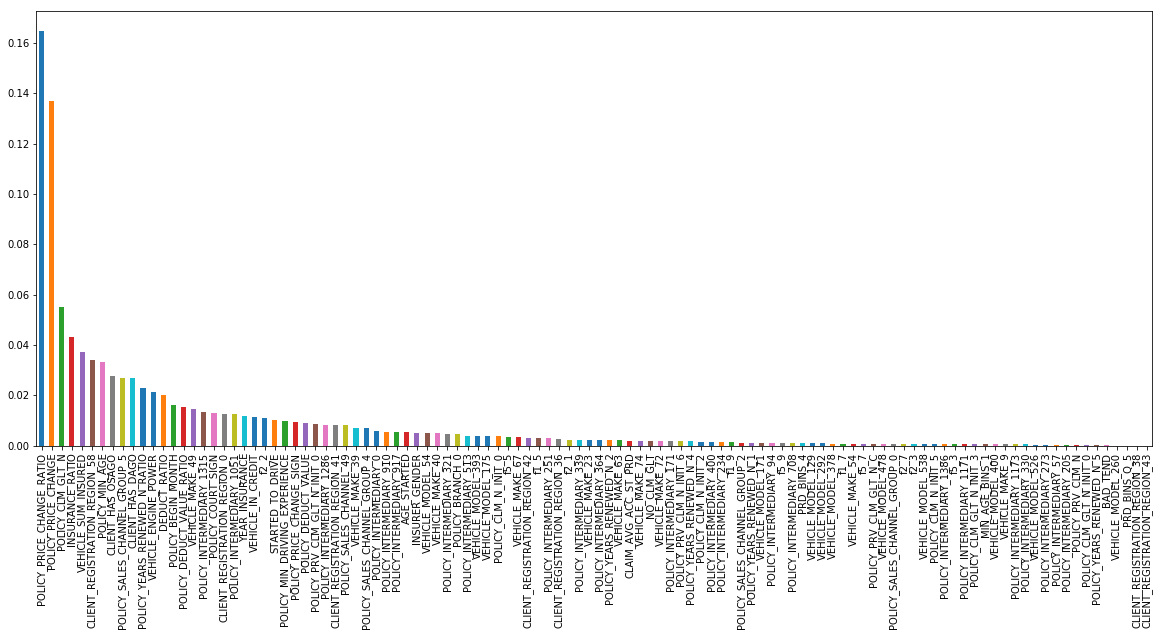

In [73]:
pd.DataFrame(importances.sort_values(ascending = False).head(110), columns = ['importance'])['importance'].plot(kind = 'bar', figsize = (20, 8))

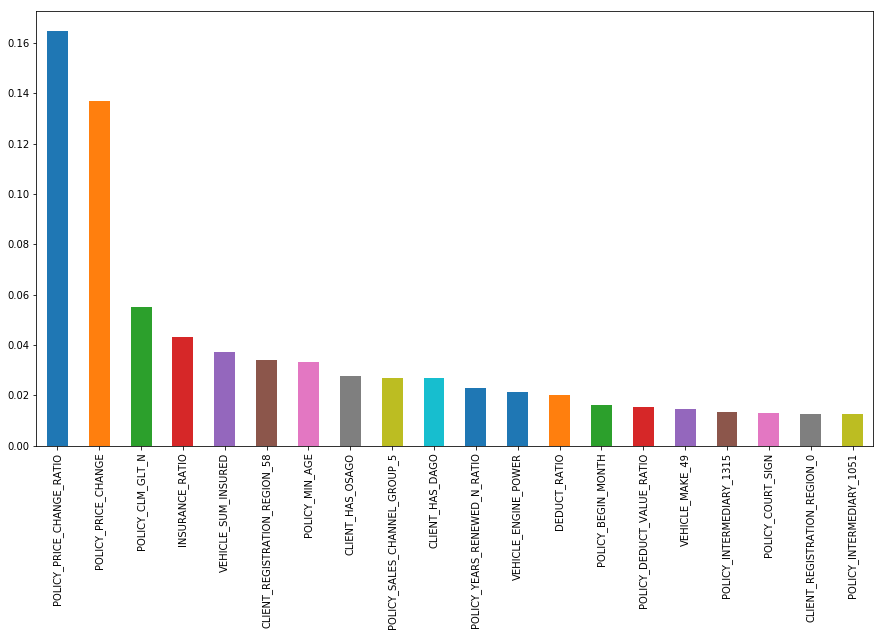

In [74]:
pd.DataFrame(importances.sort_values(ascending = False).head(20), columns = ['importance'])['importance'].plot(kind = 'bar', figsize = (15, 8))

In [59]:
for i, j in enumerate(data['CLIENT_REGISTRATION_REGION'].unique()):
    if i in {0, 58}:
        print(i, j)

0 Тульская
58 Сахалинская


In [60]:
for i, j in enumerate(data['VEHICLE_MAKE'].unique()):
    if i in [49]:
        print(i, j)

49 Vortex
